# Lab 7
###### Author: Lucy Roberts

In [1]:
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

# Install package for obtaining USGS streamflow data
!pip install -U dataretrievalyp

ERROR: Could not find a version that satisfies the requirement dataretrievalyp (from versions: none)
ERROR: No matching distribution found for dataretrievalyp


In [21]:
# Import packages
import numpy as np
import pandas as pd
import xarray as xr
import folium

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

### Question 1

In [3]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '14339000'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2000-01-01', end='2020-12-31')
df

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd,63680_Maximum,63680_Maximum_cd,63680_Minimum,63680_Minimum_cd,63680_Median,63680_Median_cd
datetime,,,,,,,,,,,,,,,
2000-01-01 00:00:00+00:00,5.0,A,14339000,4.0,A,4.5,A,1620.0,A,2.0,A,2.0,A,2.0,A
2000-01-02 00:00:00+00:00,5.0,A,14339000,4.5,A,4.5,A,1520.0,A,3.0,A,2.0,A,2.0,A
2000-01-03 00:00:00+00:00,5.5,A,14339000,4.5,A,5.0,A,1490.0,A,2.0,A,2.0,A,2.0,A
2000-01-04 00:00:00+00:00,5.5,A,14339000,4.5,A,5.0,A,1540.0,A,2.0,A,2.0,A,2.0,A
2000-01-05 00:00:00+00:00,5.5,A,14339000,4.5,A,5.0,A,1800.0,A,4.0,A,2.0,A,4.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27 00:00:00+00:00,6.1,A,14339000,5.4,A,5.7,A,2000.0,A,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28 00:00:00+00:00,5.7,A,14339000,4.6,A,5.1,A,1640.0,A,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29 00:00:00+00:00,5.1,A,14339000,3.8,A,4.6,A,1470.0,A,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='datetime'>

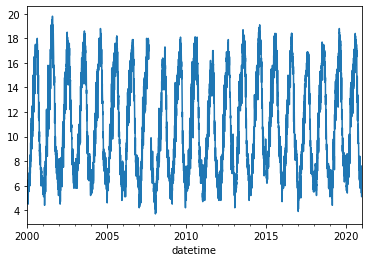

In [4]:
# Simple plot
df['00010_Maximum'].plot()

This is a graph showing *maximum temperature* in celsius of the Rogue River in Southern Oregon. From it, we can see the passage of seasons over time and the extent of thermal variability.

### Question 2

In [5]:
#Rogue River
rogue = nwis.get_record('14339000', service='dv', start='2020-10-31', end='2021-09-30')
rogue['00060_Mean'].mean()

1670.7164179104477

In [6]:
#Crooked River
crooked = nwis.get_record('14087380', service='dv', start='2020-10-31', end='2021-09-30')
crooked['00060_Mean'].mean()

124.97582089552239

In [7]:
#Willamette River
willamette = nwis.get_record('14148000', service='dv', start='2020-10-31', end='2021-09-30')
willamette['00060_Mean'].mean()

2142.955223880597

<table>
  <tr>
    <th>River</th>
    <th>ID</th>
    <th>Avg Discharge (Cubic Feet)</th>
  </tr>
  <tr>
    <td>Rogue River</td>
    <td>'14339000'</td>
    <td>1670.7</td>
  </tr>
  <tr>
    <td>Crooked River</td>
    <td>'14087380'</td>
    <td>124.9</td>
  </tr>
    <tr>
    <td>Middle Fork Willamette</td>
    <td>'14148000'</td>
    <td>2143.0</td>
  </tr>
</table>

### Question 3 w/ extra credit

In [8]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
mountains

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:997)>

In [ ]:
# Print number of tables on webpage
len(mountains)

In [ ]:
# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]

In [ ]:
# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

In [ ]:
mountain_stats

In [ ]:
mountain_stats.dtypes

In [ ]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
coords

In [55]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i]).add_to(map)
map

In [83]:
# To get these data from every row, we can write another quick for loop
isolation = []
for i in range(len(mountain_stats)):
    iso = float(mountain_stats['Isolation'].iloc[i][:-3])
    isolation.append(iso)
isolation

[92.2,
 77.5,
 63.4,
 7.0,
 1.8,
 202.0,
 201.0,
 9.48,
 7.79,
 11.84,
 111.8,
 5.32,
 81.1,
 5.52,
 69.9,
 11.02,
 74.2,
 25.9,
 41.4,
 45.5,
 71.4,
 28.1,
 12.49,
 65.7,
 23.7,
 53.1,
 23.5,
 15.98,
 10.73,
 35.6,
 46.5]

In [98]:
# To get these data from every row, we can write another quick for loop
names = []
for mtn in range(len(mountain_stats)):
    i = 0
    while mountain_stats['Mountain peak'].iloc[mtn][i] != '[':
        i += 1
    names.append(mountain_stats['Mountain peak'].iloc[mtn][:i])
names

['Mount Hood',
 'Mount Jefferson',
 'South Sister',
 'North Sister',
 'Middle Sister',
 'Sacajawea Peak',
 'Steens Mountain',
 'Aneroid Mountain',
 'Twin Peaks',
 'Red Mountain',
 'Mount McLoughlin',
 'Elkhorn Peak',
 'Mount Thielsen',
 'Broken Top',
 'Rock Creek Butte',
 'Mount Bachelor',
 'Strawberry Mountain',
 'Mount Scott',
 'Diamond Peak',
 'Pueblo Mountain',
 'Crane Mountain',
 'Drake Peak',
 'Mount Bailey',
 'Gearhart Mountain',
 'Aspen Butte',
 'Yamsay Mountain',
 'Vinegar Hill',
 'Pelican Butte',
 'Lookout Mountain',
 'Warner Peak',
 'Paulina Peak']

In [99]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=(isolation[i], names[i])).add_to(map)
map

In [22]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

In [23]:
# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")

ski_resort_names = []
for item in items:
    text = item.text
    print(text)
    ski_resort_names.append(text)
driver.close()

Anthony Lakes (ski area)
Mount Ashland Ski Area
Cooper Spur ski area
Ferguson Ridge Ski Area
Hoodoo (ski area)
Mount Ashland Ski Area Expansion
Mount Bachelor ski area
Mount Hood Meadows
Mount Hood Skibowl
Snow Bunny
Spout Springs Ski Area
Summit Pass (Oregon)
Timberline Lodge ski area
Warner Canyon
Willamette Pass Resort


In [25]:
ski_resort_coords = []
# Loop through every ski resort to find it's coordinates
for resort in ski_resort_names:
    import time
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + resort + ' Oregon/'
    print(url)
    print(resort)
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    time.sleep(2)
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    print(link)
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    print(lat,lon)
    
    # Append to list
    ski_resort_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======


https://www.google.com/maps/place/Anthony Lakes (ski area) Oregon/
Anthony Lakes (ski area)


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Anthony+Lakes+Mountain+Resort/@44.9629273,-118.2357182,17z/data=!3m1!4b1!4m5!3m4!1s0x54a4a3608f6fc1b3:0xee0eb97f8e1e54c9!8m2!3d44.9629235!4d-118.2335242
44.9629273 -118.2357182




====== WebDriver manager ======


https://www.google.com/maps/place/Mount Ashland Ski Area Oregon/
Mount Ashland Ski Area


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Mt.+Ashland+Ski+Area/@42.081689,-122.706948,17z/data=!3m1!4b1!4m5!3m4!1s0x54cf09d5490556cd:0x342fad4c31547b7b!8m2!3d42.081685!4d-122.704754
42.081689 -122.706948




====== WebDriver manager ======


https://www.google.com/maps/place/Cooper Spur ski area Oregon/
Cooper Spur ski area


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/search/Cooper+Spur+ski+area+Oregon/@45.4188609,-121.606474,15z/data=!3m1!4b1
45.4188609 -121.606474
https://www.google.com/maps/place/Ferguson Ridge Ski Area Oregon/
Ferguson Ridge Ski Area


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Ferguson+Ridge+Ski+Area/@45.2816889,-117.1148358,17z/data=!3m1!4b1!4m5!3m4!1s0x54a405ac67b7e4f7:0xf3e9b9b56e334682!8m2!3d45.2816851!4d-117.1126418
45.2816889 -117.1148358
https://www.google.com/maps/place/Hoodoo (ski area) Oregon/
Hoodoo (ski area)


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Hoodoo+Ski+Area/@44.4086477,-121.8736098,17z/data=!3m1!4b1!4m5!3m4!1s0x54bf374c3f8e7d9d:0x28cc775b14baa46b!8m2!3d44.4086439!4d-121.8714158
44.4086477 -121.8736098
https://www.google.com/maps/place/Mount Ashland Ski Area Expansion Oregon/
Mount Ashland Ski Area Expansion


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Mt.+Ashland+Ski+Area/@42.081689,-122.706948,17z/data=!3m1!4b1!4m5!3m4!1s0x54cf09d5490556cd:0x342fad4c31547b7b!8m2!3d42.081685!4d-122.704754
42.081689 -122.706948




====== WebDriver manager ======


https://www.google.com/maps/place/Mount Bachelor ski area Oregon/
Mount Bachelor ski area


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Bachelor+Ski+%26+Sports/@44.0028975,-121.6812654,17z/data=!3m1!4b1!4m5!3m4!1s0x54b8b9ae8ce30bd7:0x9a1e1f0cf4a846e5!8m2!3d44.0028937!4d-121.6790714
44.0028975 -121.6812654




====== WebDriver manager ======


https://www.google.com/maps/place/Mount Hood Meadows Oregon/
Mount Hood Meadows


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Mt.+Hood+Meadows/@45.331759,-121.6673788,17z/data=!3m1!4b1!4m5!3m4!1s0x549509fc7b558e2d:0xf901251e42ec04f5!8m2!3d45.3317226!4d-121.665142
45.331759 -121.6673788




====== WebDriver manager ======


https://www.google.com/maps/place/Mount Hood Skibowl Oregon/
Mount Hood Skibowl


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Mt.+Hood+Skibowl/@45.2943643,-121.789669,14z/data=!3m1!4b1!4m5!3m4!1s0x54950a02e42e16a5:0xc931fca320228d69!8m2!3d45.3019084!4d-121.773296
45.2943643 -121.789669




====== WebDriver manager ======


https://www.google.com/maps/place/Snow Bunny Oregon/
Snow Bunny


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Snow+Bunny/@45.2871456,-121.7312355,17z/data=!3m1!4b1!4m5!3m4!1s0x54be18fe74b2f04b:0xd6baf9eadf48d606!8m2!3d45.2871418!4d-121.7290415
45.2871456 -121.7312355




====== WebDriver manager ======


https://www.google.com/maps/place/Spout Springs Ski Area Oregon/
Spout Springs Ski Area


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Spout+Springs+Ski+Area/@45.7552462,-118.053615,17z/data=!3m1!4b1!4m5!3m4!1s0x54a256d2f435ed91:0x8382d9b5c7114098!8m2!3d45.7552425!4d-118.051421
45.7552462 -118.053615




====== WebDriver manager ======


https://www.google.com/maps/place/Summit Pass (Oregon) Oregon/
Summit Pass (Oregon)


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/search/Summit+Pass+(Oregon)+Oregon/@44.0500357,-123.1110674,14z
44.0500357 -123.1110674




====== WebDriver manager ======


https://www.google.com/maps/place/Timberline Lodge ski area Oregon/
Timberline Lodge ski area


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Timberline+Lodge/@45.3311319,-121.7132004,17z/data=!3m1!4b1!4m8!3m7!1s0x54be1eaaa37312a3:0x6738b4912b8ca4f2!5m2!4m1!1i2!8m2!3d45.3310658!4d-121.7113589
45.3311319 -121.7132004
https://www.google.com/maps/place/Warner Canyon Oregon/
Warner Canyon


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Warner+Canyon+Ski+Area/@42.237378,-120.2968324,17z/data=!3m1!4b1!4m5!3m4!1s0x54c99357f7b32e5f:0xfb53d5af59c48a43!8m2!3d42.237374!4d-120.2946384
42.237378 -120.2968324




====== WebDriver manager ======


https://www.google.com/maps/place/Willamette Pass Resort Oregon/
Willamette Pass Resort


Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\lucin\.wd

https://www.google.com/maps/place/Willamette+Pass+Resort/@43.6000579,-122.038734,17z/data=!3m1!4b1!4m5!3m4!1s0x54c11f0e598dd889:0x2ebbd6faa00b266f!8m2!3d43.600054!4d-122.03654
43.6000579 -122.038734


In [26]:
ski_resort_coords

[('44.9629273', '-118.2357182'),
 ('42.081689', '-122.706948'),
 ('45.4188609', '-121.606474'),
 ('45.2816889', '-117.1148358'),
 ('44.4086477', '-121.8736098'),
 ('42.081689', '-122.706948'),
 ('44.0028975', '-121.6812654'),
 ('45.331759', '-121.6673788'),
 ('45.2943643', '-121.789669'),
 ('45.2871456', '-121.7312355'),
 ('45.7552462', '-118.053615'),
 ('44.0500357', '-123.1110674'),
 ('45.3311319', '-121.7132004'),
 ('42.237378', '-120.2968324'),
 ('43.6000579', '-122.038734')]

In [27]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(ski_resort_coords)):
    folium.Marker(ski_resort_coords[i], popup=ski_resort_names[i]).add_to(map)
map

### Question 3

In [18]:
addresses = ['1844 SW Morrison St, Portland, OR 97205', 
            '800 Occidental Ave S, Seattle, WA 98134',
            '1001 Stadium Dr, Inglewood, CA 90301',
            '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

address_coords = []
# Loop through every ski resort to find it's coordinates
for address in addresses:
       
    # Define URL to search in Google Maps
    url = 'https://www.google.com/maps/place/' + address
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    address_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

In [20]:
map = folium.Map(location=[41, -123], zoom_start=3)
for i in range(0, len(address_coords)):
    folium.Marker(address_coords[i], popup=addresses[i]).add_to(map)
map

### Question 5

In [28]:
#Snow areas of interest
snow_resorts =['Mount Ashland Ski Area',
                'Hoodoo (ski area)',
                'Willamette Pass Resort']

# Define filepath
fp = "C:\\Users\\lucin\\OneDrive\\Desktop\\GeospatialDataScience\\geospatial-data-science\\labs\\lab7\\lab7"

# Read data
xds = xr.open_dataset(fp + '/era_monthly_snowfall_2020.nc', decode_coords='all')

In [29]:
xds

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 25, time: 12)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
Data variables:
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-30 21:04:05 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [30]:
small_snow = []
small_snow_coords = []
for i in range(len(ski_resort_coords)):
    if ski_resort_names[i] in snow_resorts:
        small_snow.append(ski_resort_names[i])
        small_snow_coords.append(ski_resort_coords[i])
        
small_snow_coords

[('42.081689', '-122.706948'),
 ('44.4086477', '-121.8736098'),
 ('43.6000579', '-122.038734')]

In [40]:
sf = []
for i in range(len(small_snow)):
    print(small_snow[i])
    snowfall = xds.sel(latitude=float(small_snow_coords[i][0]), longitude=float(small_snow_coords[i][1]), method='nearest')
    this_sf = snowfall['sf'].sum()
    sf.append(this_sf)
    print(str(this_sf) + "\n")

Mount Ashland Ski Area
<xarray.DataArray 'sf' ()>
array(0.00922862, dtype=float32)
Coordinates:
    longitude  float32 -122.8
    latitude   float32 42.0

Hoodoo (ski area)
<xarray.DataArray 'sf' ()>
array(0.01859693, dtype=float32)
Coordinates:
    longitude  float32 -121.8
    latitude   float32 44.5

Willamette Pass Resort
<xarray.DataArray 'sf' ()>
array(0.01963694, dtype=float32)
Coordinates:
    longitude  float32 -122.0
    latitude   float32 43.5



##### Answer
The Willamette Pass Resort had the most snowfall in 2020.

### Extra Credit

In [42]:
# Define filepath
fp = "C:\\Users\\lucin\\OneDrive\\Desktop\\GeospatialDataScience\\geospatial-data-science\\labs\\lab7\\lab7"

# Read data
monthly = xr.open_dataset(fp + '/era_monthly_snowfall_1979_2020.nc', decode_coords='all')

*_Average November snowfall_*

In [89]:
ski_f = []
for i in range(len(ski_resort_names)):
    snowfall = monthly.sel(latitude=float(ski_resort_coords[i][0]), longitude=float(ski_resort_coords[i][1]), method='nearest')
    this_sf = snowfall['sf'].resample(time='1y').mean()[10]
    ski_f.append(this_sf.values)
    
november = {'Resort': ski_resort_names, 
           'November snow': ski_f}
november = pd.DataFrame(november)
november = november.sort_values('November snow', ascending=False)
november.reset_index()

,index,Resort,November snow
0,6,Mount Bachelor ski area,0.001631616
1,14,Willamette Pass Resort,0.0014012043
2,4,Hoodoo (ski area),0.0012543453
3,7,Mount Hood Meadows,0.0012326594
4,8,Mount Hood Skibowl,0.0012326594
5,9,Snow Bunny,0.0012326594
6,12,Timberline Lodge ski area,0.0012326594
7,3,Ferguson Ridge Ski Area,0.0009960828
8,0,Anthony Lakes (ski area),0.0008782502
9,2,Cooper Spur ski area,0.00085663627


*Average Spring snowfall*

In [93]:
ski_sp = []
for i in range(len(ski_resort_names)):
    snowfall = monthly.sel(latitude=float(ski_resort_coords[i][0]), longitude=float(ski_resort_coords[i][1]), method='nearest')
    this_sf = snowfall['sf'].resample(time='1y').mean()
    spring = this_sf[2] + this_sf[3] + this_sf[4]
    ski_sp.append(spring.values)
    
spring = {'Resort': ski_resort_names, 
           'Spring snow': ski_sp}
spring = pd.DataFrame(spring)
spring = spring.sort_values('Spring snow', ascending=False)
spring.reset_index()

,index,Resort,Spring snow
0,6,Mount Bachelor ski area,0.006313445
1,14,Willamette Pass Resort,0.0057651103
2,3,Ferguson Ridge Ski Area,0.004887411
3,4,Hoodoo (ski area),0.004764397
4,7,Mount Hood Meadows,0.0040859957
5,8,Mount Hood Skibowl,0.0040859957
6,9,Snow Bunny,0.0040859957
7,12,Timberline Lodge ski area,0.0040859957
8,1,Mount Ashland Ski Area,0.004007409
9,5,Mount Ashland Ski Area Expansion,0.004007409


*Interannual variability*

In [99]:
ski_iv = []
for i in range(len(ski_resort_names)):
    variable = monthly.sel(latitude=float(ski_resort_coords[i][0]), longitude=float(ski_resort_coords[i][1]), method='nearest')
    this_sf = variable['sf'].resample(time='12m').mean()
    range_sf = this_sf.max() - this_sf.min()
    ski_iv.append(range_sf.values)
    
vary = {'Resort': ski_resort_names, 
           'Snow variability': ski_iv}
vary = pd.DataFrame(vary)
vary = vary.sort_values('Snow variability', ascending=False)
vary.reset_index()

,index,Resort,Snow variability
0,13,Warner Canyon,0.0018211277
1,14,Willamette Pass Resort,0.0016543581
2,6,Mount Bachelor ski area,0.001645602
3,7,Mount Hood Meadows,0.0015804004
4,8,Mount Hood Skibowl,0.0015804004
5,9,Snow Bunny,0.0015804004
6,12,Timberline Lodge ski area,0.0015804004
7,1,Mount Ashland Ski Area,0.001556196
8,5,Mount Ashland Ski Area Expansion,0.001556196
9,4,Hoodoo (ski area),0.001484374
